# An Exploratory Analysis Into Diabetes

## Introduction:

New York is one of the most renowned places in the world, celebrated for its abundance of attractions and vibrant environment. However, housing in the state can be expensive, posing a significant challenge for residents and newcomers. The *New York Housing Market* dataset available on Kaggle provides a comprehensive view of the real estate data in New York City. Using the New York Housing Market dataset, this project will look at how the different cities in New York affect the price of homes relative to their number of bedrooms, bathrooms, and square footage. The question we will be answering is **"What is the relationship between price and square footage of properties in the cities of New York?"**

### Preliminary Exploratory Data Analysis:

In [32]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 10)

In [2]:
set.seed(123)

### 1. Read and Tidy Data

In [85]:
diabetes <- read_csv("data/diabetes.csv")
diabetes

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Female,80,0,1,never,25.19,6.6,140,0
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5.0,155,0
Male,76,1,1,current,20.14,4.8,155,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,80,0,0,No Info,27.32,6.2,90,0
Female,2,0,0,No Info,17.37,6.5,100,0
Male,66,0,0,former,27.83,5.7,155,0


In [92]:
diabetes <- diabetes |>
              mutate(diabetes = as_factor(diabetes)) |>
              mutate(diabetes = fct_recode(diabetes, "yes" = "1", "no" = "0")) |> 
              mutate(hypertension = as_factor(hypertension)) |> 
              mutate(hypertension = fct_recode(hypertension, "yes" = "1", "no" = "0")) |> 
              mutate(heart_disease = as_factor(heart_disease)) |> 
              mutate(heart_disease = fct_recode(heart_disease, "yes" = "1", "no" = "0"))
diabetes

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `diabetes = fct_recode(diabetes, yes = "1", no = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”


gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Female,80,no,yes,never,25.19,6.6,140,no
Female,54,no,no,No Info,27.32,6.6,80,no
Male,28,no,no,never,27.32,5.7,158,no
Female,36,no,no,current,23.45,5.0,155,no
Male,76,yes,yes,current,20.14,4.8,155,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,80,no,no,No Info,27.32,6.2,90,no
Female,2,no,no,No Info,17.37,6.5,100,no
Male,66,no,no,former,27.83,5.7,155,no


In [94]:
diabetes_tidy <- diabetes |> 
                    select(-gender, - hypertension, -heart_disease, -smoking_history)
diabetes_tidy

age,bmi,HbA1c_level,blood_glucose_level,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
80,25.19,6.6,140,no
54,27.32,6.6,80,no
28,27.32,5.7,158,no
36,23.45,5.0,155,no
76,20.14,4.8,155,no
⋮,⋮,⋮,⋮,⋮
80,27.32,6.2,90,no
2,17.37,6.5,100,no
66,27.83,5.7,155,no


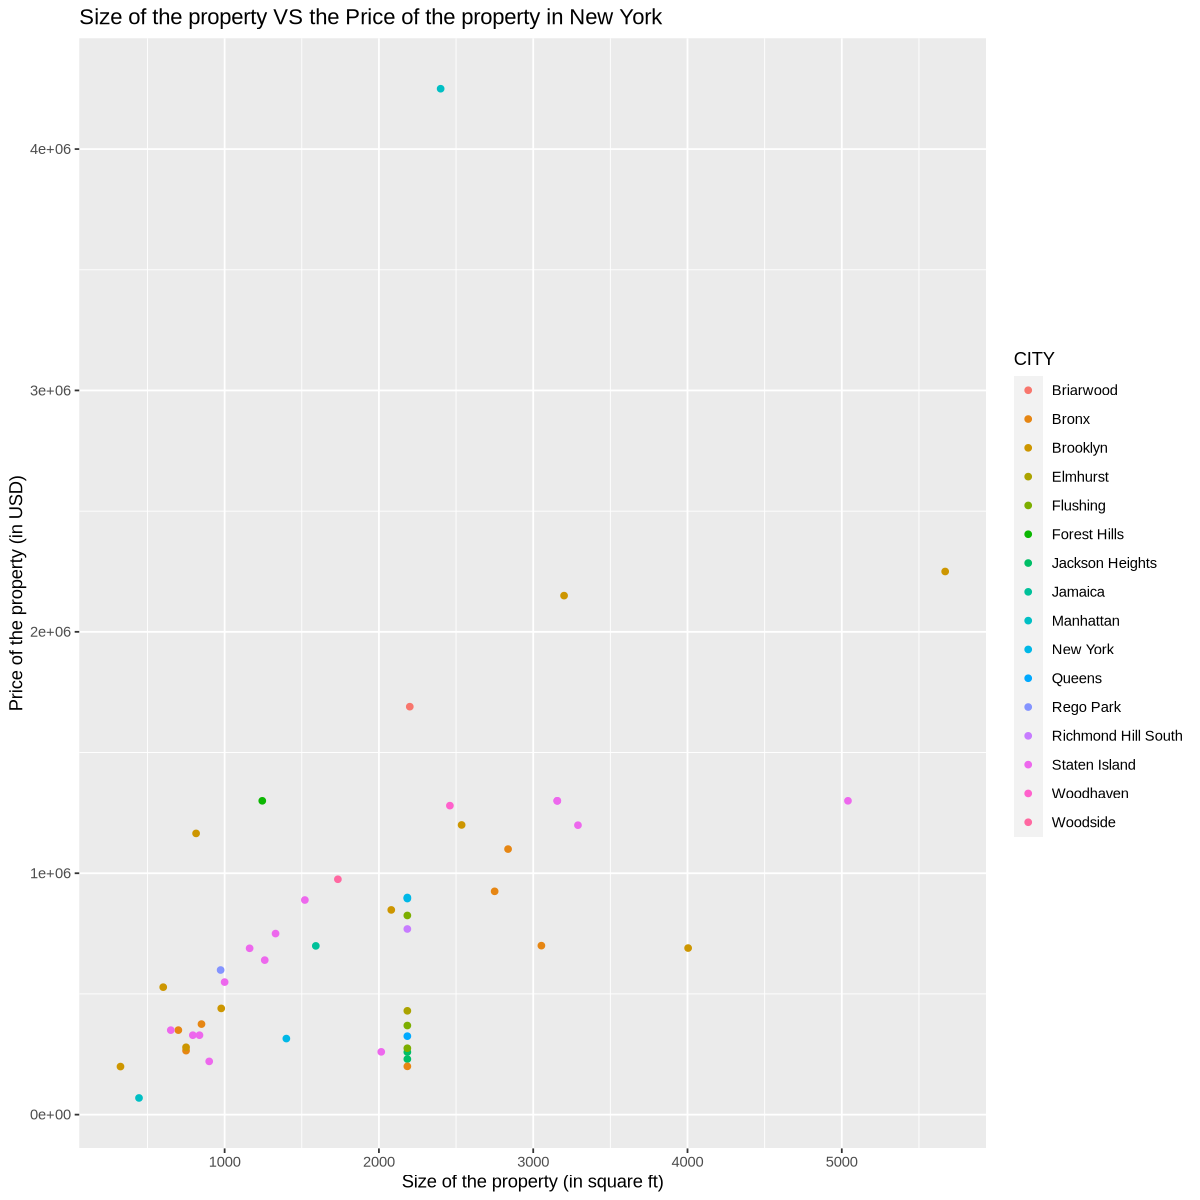

In [7]:
options(repr.plot.height = 10, repr.plot.width = 10)
price_sqft_plot <- newyork_tidy_sample |>
                ggplot(aes(x=PROPERTYSQFT, y=PRICE, color = CITY)) + #color later when figure out how to modify state
                geom_point() +
                labs(x="Size of the property (in square ft)", y= "Price of the property (in USD)") +
                ggtitle("Size of the property VS the Price of the property in New York")
price_sqft_plot

In [29]:
property_in_each_city_count <- newyork_tidy |>
                                group_by(CITY) |>
                                summarize(count = n()) |> 
                                arrange(desc(count))
property_in_each_city_count


CITY,count
<chr>,<int>
Brooklyn,1098
New York,739
Staten Island,507
Bronx,478
Manhattan,359
⋮,⋮
Canarsie,1
Ditmas Park,1
New Hyde Park,1


*After doing some preliminary data analysis of our dataset, we discovered that there are too many cities in which the property can be classified. To be exact, there are **69 cities** we can classify our data into within our dataset. Hence, we have decided to take the **10 cities with the most properties** from our dataset.*

CITY,count
<chr>,<int>
Brooklyn,1098
New York,739
Staten Island,507
Bronx,478
Manhattan,359
Flushing,125
Forest Hills,87
Queens,81
Jamaica,75


$title
[1] "top 10 cities in property count bar graph"

attr(,"class")
[1] "labels"

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY
<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Condo for sale,315000,2,2,1400.000,New York
House for sale,260000,4,2,2015.000,Staten Island
Condo for sale,69000,3,1,445.000,Manhattan
House for sale,690000,5,2,4004.000,Brooklyn
Condo for sale,899500,2,2,2184.208,New York
⋮,⋮,⋮,⋮,⋮,⋮
Condo for sale,945000,2,2,903.000,Manhattan
Multi-family home for sale,2999999,15,9,3600.000,Brooklyn
Co-op for sale,599000,1,1,2184.208,Manhattan


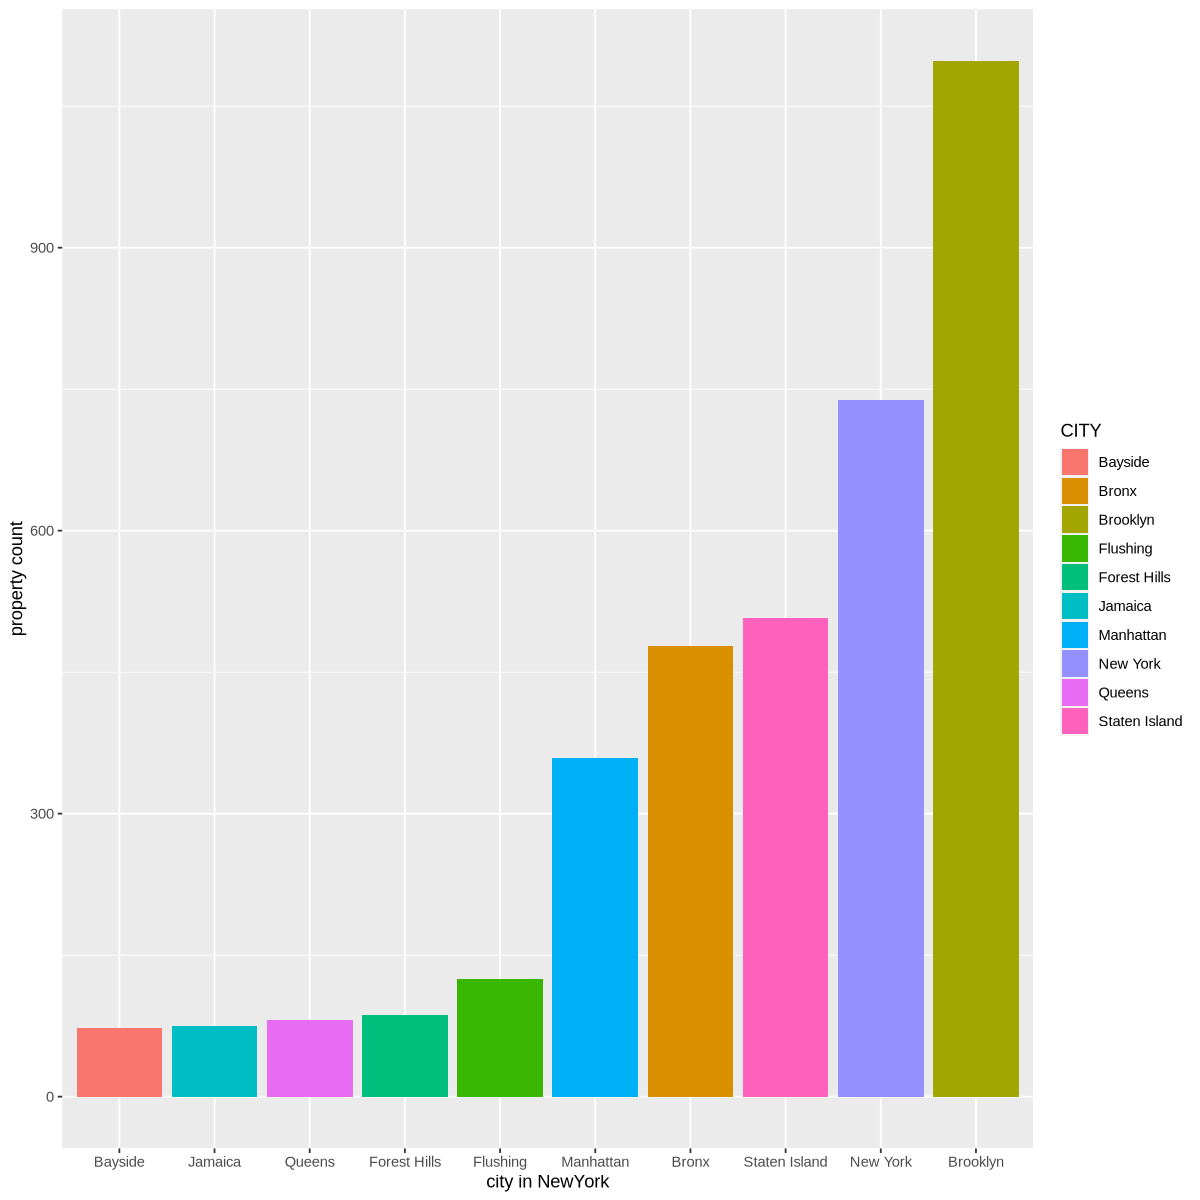

In [36]:
top_10_cities <- c("Brooklyn", "New York", "Staten Island", "Bronx", "Manhattan", 
                           "Flushing", "Forest Hills", "Queens", "Jamaica", "Bayside")
top_10 <- head(property_in_each_city_count,10) |>
            arrange(desc(count))
top_10
city_plot <- ggplot(top_10, aes(x=reorder(CITY,count), y=count, fill=CITY)) +
                    geom_bar(stat="identity") +
labs(x= "city in NewYork", y= "property count")
ggtitle("top 10 cities in property count bar graph")
city_plot
newyork_subset <- newyork_tidy |>
                    filter(CITY %in% top_10_cities)
newyork_subset

In [10]:
newyork_subset <- newyork_subset |>
                    mutate(PricePerSQFT = PRICE / PROPERTYSQFT)
newyork_subset

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,CITY,PricePerSQFT
<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
Condo for sale,315000,2,2,1400.000,New York,225.0000
House for sale,260000,4,2,2015.000,Staten Island,129.0323
Condo for sale,69000,3,1,445.000,Manhattan,155.0562
House for sale,690000,5,2,4004.000,Brooklyn,172.3277
Condo for sale,899500,2,2,2184.208,New York,411.8198
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Condo for sale,945000,2,2,903.000,Manhattan,1046.5116
Multi-family home for sale,2999999,15,9,3600.000,Brooklyn,833.3331
Co-op for sale,599000,1,1,2184.208,Manhattan,274.2413


In [77]:
average_price_persqft <- newyork_subset |>
                            group_by(CITY) |> 
                            summarize(avg_price = mean(PricePerSQFT)) 
average_price_persqft

CITY,avg_price
<chr>,<dbl>
Bayside,470.6947
Bronx,361.2235
Brooklyn,669.3502
Flushing,558.1174
Forest Hills,352.7798
Jamaica,359.5431
Manhattan,963.9923
New York,1120.5663
Queens,570.6776


**Summarizing Data**

In [12]:
ny_housing_split <- initial_split(newyork_subset, prop = 0.75, strata = CITY)
ny_housing_train <- training(ny_housing_split)
ny_housing_test <- testing(ny_housing_split)

In [13]:
glimpse(ny_housing_train)

Rows: 2,715
Columns: 7
$ TYPE         <chr> "Co-op for sale", "Co-op for sale", "Co-op for sale", "Mu…
$ PRICE        <dbl> 265000, 375000, 350000, 1100000, 925000, 700000, 119000, …
$ BEDS         <dbl> 1, 2, 1, 6, 5, 6, 3, 3, 2, 4, 3, 1, 3, 2, 8, 5, 5, 3, 1, …
$ BATH         <int> 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, …
$ PROPERTYSQFT <dbl> 750.000, 850.000, 700.000, 2837.000, 2750.000, 3053.000, …
$ CITY         <chr> "Bronx", "Bronx", "Bronx", "Bronx", "Bronx", "Bronx", "Br…
$ PricePerSQFT <dbl> 353.33333, 441.17647, 500.00000, 387.73352, 336.36364, 22…


In [14]:
glimpse(ny_housing_test)

Rows: 907
Columns: 7
$ TYPE         <chr> "Condo for sale", "Condo for sale", "Co-op for sale", "Ho…
$ PRICE        <dbl> 69000, 899500, 199000, 750000, 1300000, 2150000, 199900, …
$ BEDS         <dbl> 3, 2, 3, 2, 10, 8, 1, 2, 3, 1, 1, 3, 3, 3, 1, 5, 6, 7, 3,…
$ BATH         <int> 1, 2, 1, 2, 8, 4, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3, 2, …
$ PROPERTYSQFT <dbl> 445.000, 2184.208, 325.000, 1330.000, 5040.000, 3200.000,…
$ CITY         <chr> "Manhattan", "New York", "Brooklyn", "Staten Island", "St…
$ PricePerSQFT <dbl> 155.05618, 411.81978, 612.30769, 563.90977, 257.93651, 67…


In [15]:
city_proportions <- ny_housing_train |>
                      group_by(CITY) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(ny_housing_train))

city_proportions

CITY,n,percent
<chr>,<int>,<dbl>
Bayside,51,1.878453
Bronx,356,13.112339
Brooklyn,820,30.202578
Flushing,91,3.351750
Forest Hills,69,2.541436
Jamaica,53,1.952118
Manhattan,272,10.018416
New York,559,20.589319
Queens,64,2.357274


**Pre-liminary Exploratory Data Visualization**

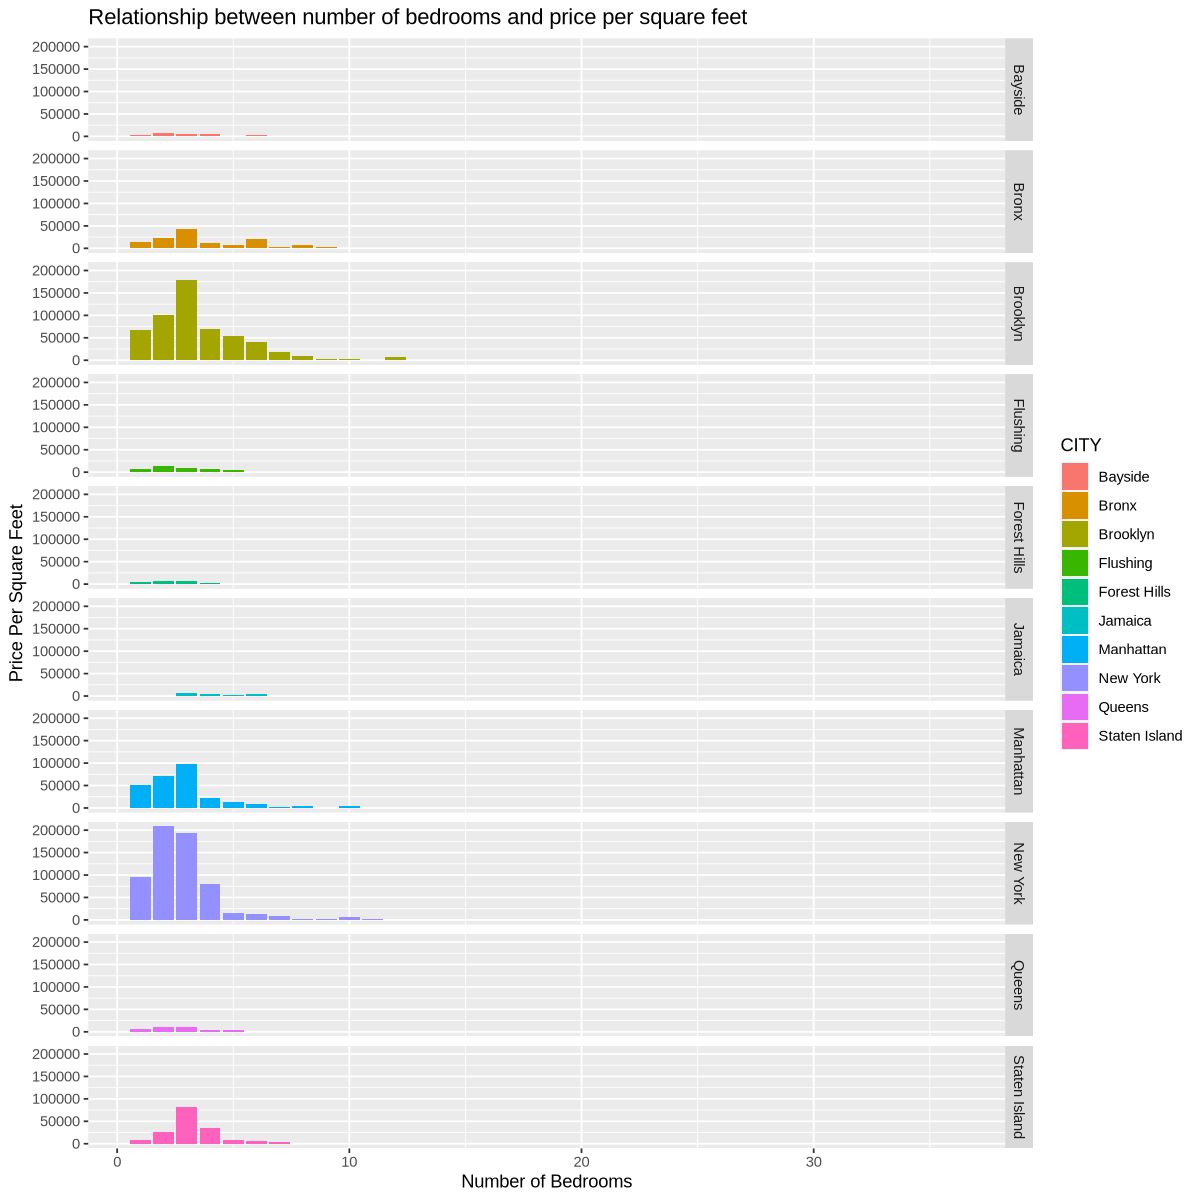

In [84]:
bed_plot <- ny_housing_train |> 
            ggplot(aes(x = BEDS, y = PricePerSQFT, fill = CITY)) +
            geom_bar(stat = "identity") +
            facet_grid(rows = vars(CITY)) +
            labs(x = "Number of Bedrooms", y = "Price Per Square Feet", color = "City") +
            ggtitle("Relationship between number of bedrooms and price per square feet")
bed_plot

In [16]:
ny_housing_recipe <- recipe(CITY ~ PricePerSQFT + PROPERTYSQFT, data = ny_housing_train) |>
                      step_scale(all_predictors()) |>
                      step_center(all_predictors())

**Methods:**

This study analyzes a dataset containing information about properties in various cities in New York, including the type of property, price, number of bedrooms, number of bathrooms, property square footage, city, and price per square foot. The dataset includes a variety of property types, such as condos, houses, and co-ops, and covers different cities like New York, Manhattan, Brooklyn, and Staten Island. To analyze the data, we will first perform descriptive statistics to understand the distribution of the PRICE and PROPERTYSQFT and identify any outliers or missing values. Next, We will employ data visualization techniques, such as scatter plots and regression lines, to visually illustrate the relationship between housing prices and these factors across different cities. We will also use statistical tests, such as knn classification, to determine the strength and direction of the relationships between variables. Finally, we will build predictive models, such as linear regression, to predict property prices based on the available features and evaluate the performance of the models.

**Expected Outcomes and Significance:**